In [32]:
import pandas as pd
import numpy as np
# These are the two most useful methods for stats
cars = pd.read_csv("cars.csv")

In [49]:
# Describe method
cars.describe()
cars['mpg'].describe()['min']

10.4

In [34]:
# Can be customized
cars.describe(include = 'all')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mazda RX4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,NaN,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,NaN,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,NaN,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,NaN,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,NaN,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000


In [35]:
# Statistical functions
print(cars['mpg'].min())
print(cars['mpg'].max())
print(cars['mpg'].mean())
print(cars['mpg'].median())
print(cars['mpg'].std())

10.4
33.9
20.090624999999996
19.2
6.026948052089105


In [36]:
# A few more statistical functions
print(cars['mpg'].mode()) #a list of the most commonly occurring values
print(cars['mpg'].rank()) #rank of values in a dataframe, either numerically or alphabetically
print(cars['mpg'].var()) #variance

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
dtype: float64
0     19.5
1     19.5
2     24.5
3     21.5
4     15.0
5     14.0
6      4.0
7     26.0
8     24.5
9     16.5
10    13.0
11    11.0
12    12.0
13     7.5
14     1.5
15     1.5
16     5.0
17    31.0
18    29.5
19    32.0
20    23.0
21     9.0
22     7.5
23     3.0
24    16.5
25    28.0
26    27.0
27    29.5
28    10.0
29    18.0
30     6.0
31    21.5
Name: mpg, dtype: float64
36.32410282258065


In [37]:
# Quartiles and percentiles
# Can work across the entire dataset, although computation is column-wise
cars.quantile(0.25)
# First quartile
# Notice that we are specifying QUANTILE, not QUARTILE
# The quartile would be 1 in this case, but quantile is 0.25 (25% of values)
# 75% of values are equal to the displayed value or less

mpg      15.42500
cyl       4.00000
disp    120.82500
hp       96.50000
drat      3.08000
wt        2.58125
qsec     16.89250
vs        0.00000
am        0.00000
gear      3.00000
carb      2.00000
Name: 0.25, dtype: float64

In [38]:
cars.quantile(0.75)

mpg      22.80
cyl       8.00
disp    326.00
hp      180.00
drat      3.92
wt        3.61
qsec     18.90
vs        1.00
am        1.00
gear      4.00
carb      4.00
Name: 0.75, dtype: float64

In [44]:
cars.quantile(0.95)
# Another way of understanding this output: 5% of cars have 31.3 mpg or greater, etc.

31.299999999999997

<AxesSubplot:xlabel='wt', ylabel='Density'>

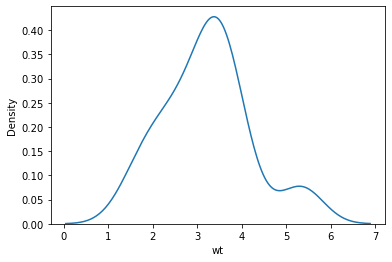

In [50]:
# Graphical descriptive statistics
# Let's first visualize the column we want to analyze
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(cars['wt'])

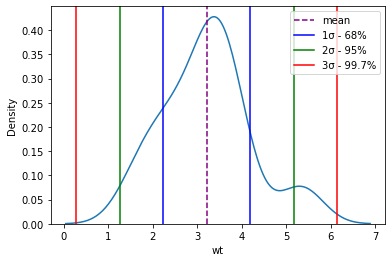

In [51]:
wt_mean = cars['wt'].mean()
wt_sd = cars['wt'].std()
sns.kdeplot(cars['wt'])
plt.axvline(wt_mean, color='purple', label='mean', linestyle='--')
plt.axvline(wt_mean + wt_sd, color='blue', label='1σ - 68%')
plt.axvline(wt_mean - wt_sd, color='blue')
plt.axvline(wt_mean + 2 * wt_sd, color='green', label='2σ - 95%')
plt.axvline(wt_mean - 2 * wt_sd, color='green')
plt.axvline(wt_mean + 3 * wt_sd, color='red', label='3σ - 99.7%')
plt.axvline(wt_mean - 3 * wt_sd, color='red')
plt.legend()

In [54]:
# Bonus: Value Counts
# Displays unique values and the frequency of each value in the column
cars['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [55]:
# Value counts using percentages
cars['cyl'].value_counts(normalize = True)

8    0.43750
4    0.34375
6    0.21875
Name: cyl, dtype: float64

In [58]:
# Bonus: Group By
# Works exactly the same as GROUP BY in SQL
# Compresses the grouped column into unique values and a statistic for each
# Find the mean car mileage for each unique value of cylinder
cars[['cyl','mpg']].groupby('cyl').mean()

,mpg
cyl,
4,26.663636
6,19.742857
8,15.100000


In [62]:
# Or for the entire dataset
cars.groupby('cyl').mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000
